# Laboratorio 5 
## Redes Neuronales (NN) Básicas usando TensorFlow
### Sara Zavala, Amado Garcia

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

### Generador de Data

In [3]:
data =  1000 
x1 = np.random.uniform(low=-10, high=10, size=(data,1))
x2 = np.random.uniform(-10, 10, (data,1))

entradas_generadas = np.column_stack((x1,x2))

### Metas generadas

In [4]:
ruido = np.random.uniform(-1, 1, (data,1))
targets_generados = 2 * x1 - 3 * x2 + 5 + ruido
np.savez('Datos_TF', entradas = entradas_generadas, targets = targets_generados)

### Aplicacion de Tensor

In [5]:
datos_entrenamiento = np.load('Datos_TF.npz')
tamanio_entrada = 2  
tamanio_salida = 1  

In [6]:
model = tf.keras.Sequential([tf.keras.layers.Dense(tamanio_salida, kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))])

In [7]:
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer = optimizador_adhoc, loss='mean_squared_error')
model.fit(datos_entrenamiento['entradas'], datos_entrenamiento['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 21.9769
Epoch 2/100
32/32 - 0s - loss: 1.1167
Epoch 3/100
32/32 - 0s - loss: 0.4218
Epoch 4/100
32/32 - 0s - loss: 0.3795
Epoch 5/100
32/32 - 0s - loss: 0.3880
Epoch 6/100
32/32 - 0s - loss: 0.3836
Epoch 7/100
32/32 - 0s - loss: 0.3595
Epoch 8/100
32/32 - 0s - loss: 0.3673
Epoch 9/100
32/32 - 0s - loss: 0.3542
Epoch 10/100
32/32 - 0s - loss: 0.3658
Epoch 11/100
32/32 - 0s - loss: 0.3451
Epoch 12/100
32/32 - 0s - loss: 0.4006
Epoch 13/100
32/32 - 0s - loss: 0.3703
Epoch 14/100
32/32 - 0s - loss: 0.3443
Epoch 15/100
32/32 - 0s - loss: 0.3560
Epoch 16/100
32/32 - 0s - loss: 0.3719
Epoch 17/100
32/32 - 0s - loss: 0.3821
Epoch 18/100
32/32 - 0s - loss: 0.3568
Epoch 19/100
32/32 - 0s - loss: 0.3473
Epoch 20/100
32/32 - 0s - loss: 0.3571
Epoch 21/100
32/32 - 0s - loss: 0.3877
Epoch 22/100
32/32 - 0s - loss: 0.3641
Epoch 23/100
32/32 - 0s - loss: 0.3661
Epoch 24/100
32/32 - 0s - loss: 0.3512
Epoch 25/100
32/32 - 0s - loss: 0.3750
Epoch 26/100
32/32 - 0s - loss: 0

### Graficos

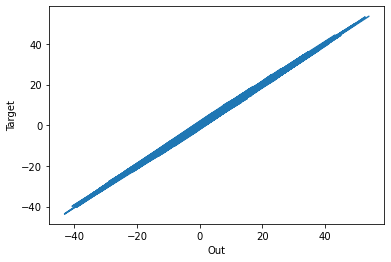

In [8]:
plt.plot(np.squeeze(model.predict_on_batch(datos_entrenamiento['entradas'])), np.squeeze(datos_entrenamiento['targets']))
plt.xlabel('Out')
plt.ylabel('Target')
plt.show()

In [11]:
fig = px.scatter(x = np.squeeze(model.predict_on_batch(datos_entrenamiento['entradas'])), y =  np.squeeze(datos_entrenamiento['targets']))
fig.update_layout(title="Predicciones vs Metas",xaxis_title="Predicciones",yaxis_title="Metas",width = 600,height = 400,)
fig.show()

### Preguntas de Caso

1. Cambie el número de observaciones a 100,000.  ¿Qué ocurre?

El tiempo de ejcucion fue mayor, este fue de alrededor 3 minutos, mientras que con la primera muestra, este fue unicamente de 30 o 60 segundos mas o menos


2. “Juegue” un poco con la tasa de aprendizaje.  Los valores como 0.0001, 0.001, 0.1, 1 son interesantes para observar ¿Qué diferencias se observan?  ¿Se comporta bien el algoritmo?


0.01
- Convergencia a 0
- Pesos entre -2 a 2
- Sesgo = 5
- Grafica inclinada a 45 grados

0.1
- Péridad con tendencia al infinito
- No contamos con pesos o sesgos
- Datos de salida = NAN

1
- Sin datos consluyentes
- NAN






3. Cambie la función de pérdida.  Una función altenativa es la “Huber Loss”.La función de pérdida Huber es más adecuada que la L2.norm cuando tenemos valores atípicos, ya que es menos sensitiva a los mismos (en nuestro ejemplo no tenemos valores atípicos, pero seguramente se topará con ellos en el futuro).  La L2-norm eleva todas las diferencias al cuadrado, por lo que los valores atípicos tienen mucha influencia sobre los resultados.  La sintáxis correcta de la función de pérdida Huber es “huber_loss”.

- Las perdidas que regresa el model son menores que con la funcion Huber
- Los pesos y sesgos son similares en ambas funciones
- Las graficas de Huber, demuestra ser mas estrecha que la de model